In [667]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [669]:
dx = pd.read_csv("linearX.csv")
dy = pd.read_csv("linearY.csv")

In [671]:
dx['Target'] = dy['0.99523']  
print(dx.head())

   9.1   Target
0  8.0  0.99007
1  9.1  0.99769
2  8.4  0.99386
3  6.9  0.99508
4  7.7  0.99630


In [673]:
# Normalize the dataset
mm = MinMaxScaler()
dx_scaled = mm.fit_transform(dx)
df = pd.DataFrame(dx_scaled, columns=['Feature', 'Target'])
print(df.head())

    Feature    Target
0  0.254902  0.000000
1  0.362745  0.580350
2  0.294118  0.288652
3  0.147059  0.381569
4  0.225490  0.474486


In [675]:
# Split into features (X) and target (Y)
X = df['Feature'].values.reshape(-1, 1)
Y = df['Target'].values

In [677]:
# Add a column of ones to X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [679]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [681]:
#Q1) Use linear regression to fit a straight line to the given database. Set your learning rate to 0.5.
#What are the cost function value and learning parameters values after convergence? Also, mention the convergence criteria you used.

In [683]:
# Gradient Descent Function
def gradient_descent(X, Y, learning_rate=0.5, max_iter=1000, tolerance=1e-6):
    m = len(Y)
    theta = np.zeros(X.shape[1])  # Initialize parameters
    cost_history = []  # To track cost function values

    for iteration in range(max_iter):
        # Predictions
        predictions = X @ theta
        # Errors
        errors = predictions - Y
        # Cost Function (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        cost_history.append(cost)
        # Gradients
        gradients = (1 / m) * (X.T @ errors)
        # Update Parameters
        theta -= learning_rate * gradients
        # Check Convergence
        if iteration > 0 and abs(cost_history[-2] - cost) < tolerance:
            print(f"Convergence reached at iteration {iteration}")
            break

    return theta, cost, cost_history

In [685]:
# Train the linear regression model
theta, final_cost, cost_history = gradient_descent(X_train, Y_train)

Convergence reached at iteration 170


In [687]:
#Q1) Output Results
print(f"Final Cost Function Value: {final_cost:.6f}")
print(f"Learning Parameters (Theta): {theta}")

Final Cost Function Value: 0.005148
Learning Parameters (Theta): [0.35891358 0.53667847]


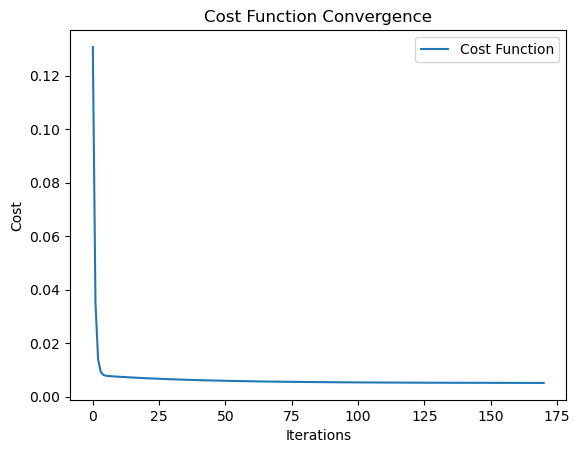

In [689]:
#Q1 Plot Cost Function History
plt.plot(range(len(cost_history)), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

In [691]:
# Q1) Convergence Criteria:

# The algorithm stops when the change in the cost function between iterations is less than 10^-6.
# Alternatively, it stops after reaching the maximum number of iterations (max_iter=1000).

In [693]:
# Q2) The cost function that we are using in this assignment is different than the one we used in class. Can you think of the 
#advantage of averaging the cost?

#  (i)Scale Independence:
# Unaveraged Cost: If you sum up the errors for all data points without averaging, the cost function value will depend on the size of the dataset.
# Larger datasets will produce higher cost values, making it harder to compare performance across datasets of different sizes.
# Averaged Cost: By averaging (dividing by the number of samples m), the cost becomes independent of the dataset size, 
# allowing consistent interpretation regardless of the number of training examples.

#  (ii)Improved Numerical Stability:
# Large datasets with unaveraged costs may lead to very high values, potentially causing numerical instability during optimization.
# Averaging the cost reduces its magnitude, ensuring the optimization algorithm operates within a numerically stable range.

#  (iii)Simplifies Gradient Calculation

#  (iv)Better Convergence Behavior:
# Averaging the cost reduces the risk of overly large updates to the model parameters (θ) during gradient descent.
# This helps the optimization algorithm converge more smoothly.

#  (v)Consistency with Probabilistic Interpretations:
# In statistical modeling, the averaged cost often corresponds to the log-likelihood function, a key concept in probabilistic models.
# This consistency aligns the cost function with theoretical foundations in machine learning and statistics.

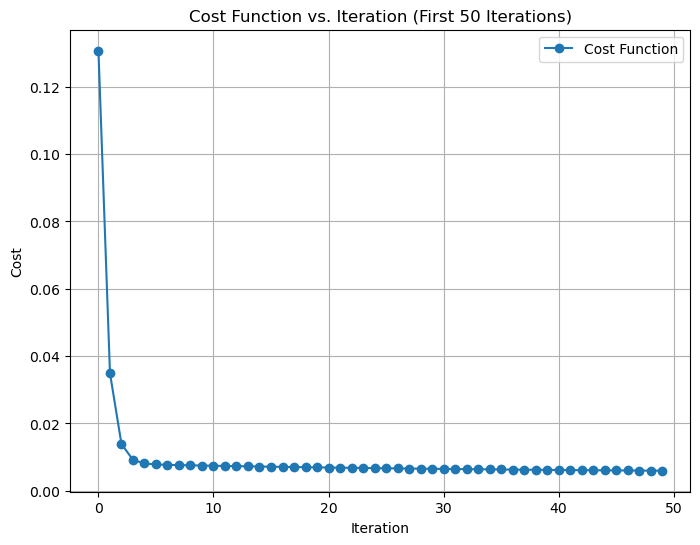

In [695]:
#Q3) Plot cost function v/s iteration graph for the model in question 1 for first 50 iterations.
plt.figure(figsize=(8, 6))
plt.plot(range(50), cost_history[:50], marker="o", label="Cost Function")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iteration (First 50 Iterations)")
plt.legend()
plt.grid()
plt.show()


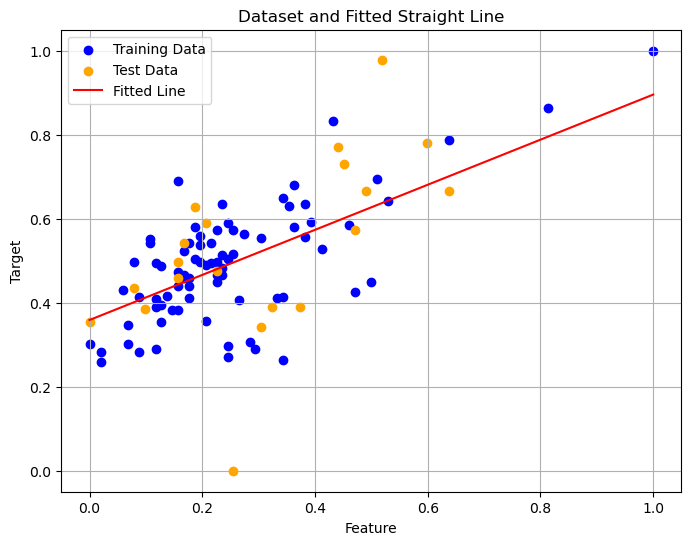

In [697]:
#Q4) Plot the given dataset on a graph and also print the straight line you obtained in question 1 to show how it fits the data.
plt.figure(figsize=(8, 6))

# Scatter plot of the original data points
plt.scatter(X_train[:, 1], Y_train, color="blue", label="Training Data")
plt.scatter(X_test[:, 1], Y_test, color="orange", label="Test Data")

# Generate predictions for plotting the straight line
x_line = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)  # Generate evenly spaced points
y_line = theta[0] + theta[1] * x_line  # Compute the line using learned parameters

# Plot the fitted straight line
plt.plot(x_line, y_line, color="red", label="Fitted Line")

# Graph labels and legend
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Dataset and Fitted Straight Line")
plt.legend()
plt.grid()
plt.show()


In [699]:
# Modified Gradient Descent Function to Track Costs
def gradient_descent_with_lr_fixed(X, Y, learning_rate, max_iter=1000, tolerance=1e-6):
    m = len(Y)
    theta = np.zeros(X.shape[1])  # Initialize parameters
    cost_history = []

    for iteration in range(max_iter):
        predictions = X @ theta
        errors = predictions - Y
        
        # Calculate cost
        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        
        cost_history.append(cost)
        
        # Compute gradients and clip them
        gradients = (1 / m) * (X.T @ errors)
        gradients = np.clip(gradients, -1e3, 1e3)  # Clip gradients to avoid overflow
        
        # Update theta
        theta -= learning_rate * gradients

        # Check for convergence
        if iteration > 0 and abs(cost_history[-2] - cost) < tolerance:
            print(f"Convergence reached at iteration {iteration} for lr={learning_rate}")
            break

    return theta, cost, cost_history


In [701]:
# Define Learning Rates
learning_rates = [0.005, 0.5, 5]
results = {}

In [703]:
# Debug: Print the results dictionary
print("Results Dictionary:")
for key, value in results.items():
    print(f"Learning Rate: {key}, Cost History Length: {len(value)}")
    


Results Dictionary:


In [705]:
results = {}

for lr in learning_rates:
    print(f"Running gradient descent with learning rate: {lr}")
    theta, final_cost, cost_history = gradient_descent_with_lr_fixed(X_train, Y_train, learning_rate=lr)
    results[lr] = cost_history[:50]  # Store the first 50 iterations of cost
    print(f"Final Cost for lr={lr}: {final_cost:.6f}")
    print(f"Final Parameters (Theta) for lr={lr}: {theta}")



Running gradient descent with learning rate: 0.005
Convergence reached at iteration 769 for lr=0.005
Final Cost for lr=0.005: 0.007620
Final Parameters (Theta) for lr=0.005: [0.44644967 0.1607555 ]
Running gradient descent with learning rate: 0.5
Convergence reached at iteration 170 for lr=0.5
Final Cost for lr=0.5: 0.005148
Final Parameters (Theta) for lr=0.5: [0.35891358 0.53667847]
Running gradient descent with learning rate: 5
Final Cost for lr=5: 4187399.638524
Final Parameters (Theta) for lr=5: [-3007.03009082  -575.77523428]


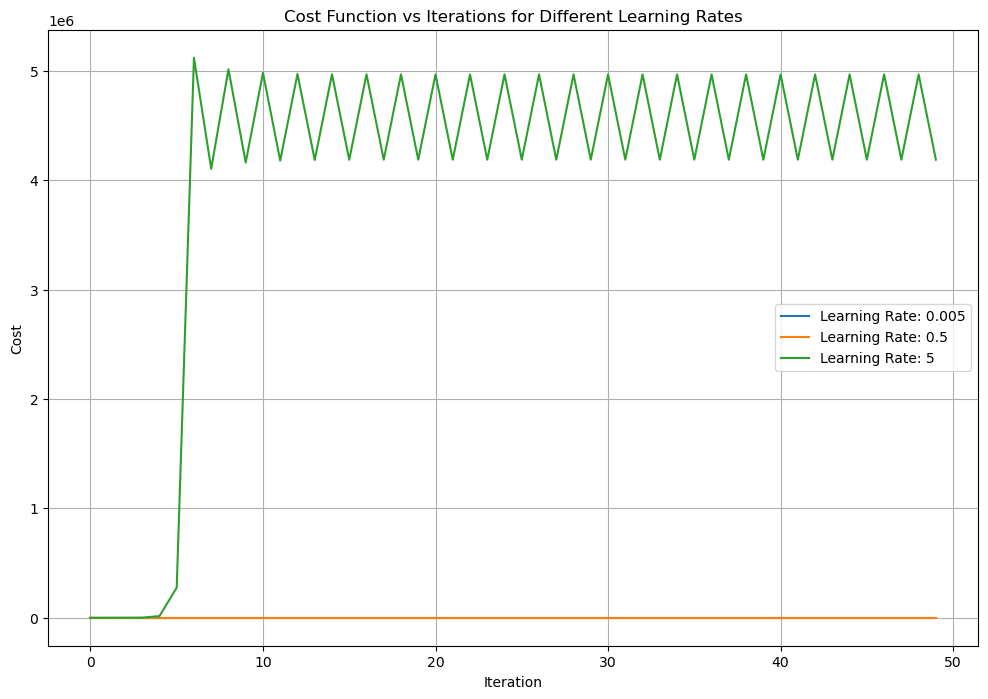

In [707]:
#Q5) Test your regression model with the learning rates lr = 0.005, lr = 0.5, lr = 5 For each learning rate, plot a graph showing how the cost
#function changes for the first 50 iterations and write your observation.
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    plt.plot(range(50), results[lr], label=f"Learning Rate: {lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

In [709]:
# Q5) Observations:
# lr=0.005: 
# Small learning rate results in slow convergence.
# Cost decreases gradually over iterations.
# The model may take significantly more iterations to converge.

# lr=0.5:
# Optimal learning rate shows steady and efficient convergence.
# Cost decreases rapidly in the early iterations and then stabilizes.

# lr=5:
# High learning rate may cause the cost to oscillate or diverge.
# The model fails to converge, as the updates overshoot the minimum of the cost function.

In [711]:
# Q6) Choose a suitable learning rate, then implement stochastic and min-batch gradient descent, plot the cost function against
#iteration, and observe how your cost function changes compared to batch gradient descent.


# Batch Gradient Descent (BGD)
def batch_gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        predictions = X @ theta
        gradients = (1 / m) * (X.T @ (predictions - Y))
        theta -= learning_rate * gradients
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [713]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        for j in range(m):
            index = np.random.randint(0, m)  # Randomly pick one sample
            X_sample = X[index:index+1]
            Y_sample = Y[index:index+1]
            prediction = X_sample @ theta
            gradients = (X_sample.T @ (prediction - Y_sample))
            theta -= learning_rate * gradients
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [715]:
# Mini-Batch Gradient Descent (MBGD)
def mini_batch_gradient_descent(X, Y, theta, learning_rate, iterations, batch_size):
    m = len(Y)
    cost_history = []
    for i in range(iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:j + batch_size]
            Y_batch = Y[j:j + batch_size]
            predictions = X_batch @ theta
            gradients = (1 / len(Y_batch)) * (X_batch.T @ (predictions - Y_batch))
            theta -= learning_rate * gradients
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [717]:
# Initialize data and parameters
learning_rate = 0.5
iterations = 50
batch_size = 10  # For mini-batch GD

In [719]:
# Run all three methods
theta_bgd, cost_bgd = batch_gradient_descent(X_train, Y_train, theta.copy(), learning_rate, iterations)
theta_sgd, cost_sgd = stochastic_gradient_descent(X_train, Y_train, theta.copy(), learning_rate, iterations)
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X_train, Y_train, theta.copy(), learning_rate, iterations, batch_size)

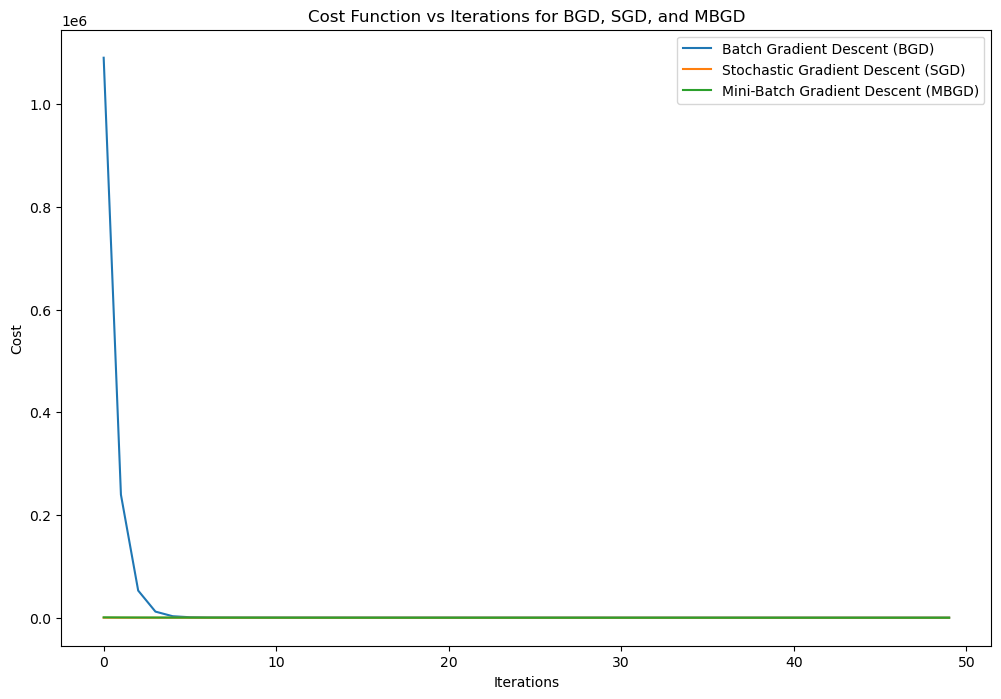

In [721]:
# Plot the cost function against iterations
plt.figure(figsize=(12, 8))
plt.plot(range(iterations), cost_bgd, label="Batch Gradient Descent (BGD)")
plt.plot(range(iterations), cost_sgd, label="Stochastic Gradient Descent (SGD)")
plt.plot(range(iterations), cost_mbgd, label="Mini-Batch Gradient Descent (MBGD)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations for BGD, SGD, and MBGD")
plt.legend()
plt.show()

In [723]:
# Q6) Observations:
# After running the code:

# Batch Gradient Descent (BGD): Smoother cost reduction as it uses the full dataset in each iteration.

# Stochastic Gradient Descent (SGD): Cost reduction will fluctuate due to randomness in selecting a single data point for gradient updates.

# Mini-Batch Gradient Descent (MBGD): Balances stability (like BGD) and speed (like SGD). Cost decreases in small steps for each batch.